In [1]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import joblib
from sklearn.utils.validation import check_is_fitted
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
df = pd.read_csv('Financial_inclusion_dataset.csv')

In [3]:
df['marital_status'].unique()

array(['Married/Living together', 'Widowed', 'Single/Never Married',
       'Divorced/Seperated', 'Dont know'], dtype=object)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [5]:
df.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [6]:
num = []
cat = []

for i in df.columns:
    if df[i].dtype == 'int64':
        num.append(i)

for i in df.columns:
    if df[i].dtype == 'object':
        cat.append(i)
cat, num

(['country',
  'uniqueid',
  'bank_account',
  'location_type',
  'cellphone_access',
  'gender_of_respondent',
  'relationship_with_head',
  'marital_status',
  'education_level',
  'job_type'],
 ['year', 'household_size', 'age_of_respondent'])

In [7]:
cat_label = ['bank_account','location_type','cellphone_access','gender_of_respondent','relationship_with_head','marital_status']

In [8]:
num

['year', 'household_size', 'age_of_respondent']

In [9]:
cat

['country',
 'uniqueid',
 'bank_account',
 'location_type',
 'cellphone_access',
 'gender_of_respondent',
 'relationship_with_head',
 'marital_status',
 'education_level',
 'job_type']

In [10]:
le = LabelEncoder()

for i in cat_label:
    df[i] = le.fit_transform(df[i])
    print(le.classes_)

['No' 'Yes']
['Rural' 'Urban']
['No' 'Yes']
['Female' 'Male']
['Child' 'Head of Household' 'Other non-relatives' 'Other relative'
 'Parent' 'Spouse']
['Divorced/Seperated' 'Dont know' 'Married/Living together'
 'Single/Never Married' 'Widowed']


In [11]:
df['country'].unique()

array(['Kenya', 'Rwanda', 'Tanzania', 'Uganda'], dtype=object)

In [12]:
df.drop('uniqueid',axis=1,inplace=True)

In [13]:
df['bank_account'].value_counts(normalize=True)

bank_account
0    0.859208
1    0.140792
Name: proportion, dtype: float64

In [14]:
target = 'bank_account'
inputs = df.drop(target,axis=1)

X = inputs
y = df[target]

In [15]:
class_ = Counter(y)
class_

Counter({0: 20212, 1: 3312})

In [16]:
ros = RandomOverSampler(random_state=30)
X_resam,y_resam = ros.fit_resample(X,y)

In [17]:
class_over = Counter(y_resam)
class_over

Counter({1: 20212, 0: 20212})

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X_resam,y_resam,test_size=0.2,random_state=30)

In [19]:
pre = ColumnTransformer(
    [
        ('cat',OneHotEncoder(handle_unknown='ignore'),cat),
        ('num','passthrough',num)
    ]
)

In [20]:
model = Pipeline(
    [
        ('p',pre),
        ('rf',RandomForestClassifier(random_state=30))
    ]
)

In [21]:
print(X_train.columns.tolist())

['country', 'year', 'location_type', 'cellphone_access', 'household_size', 'age_of_respondent', 'gender_of_respondent', 'relationship_with_head', 'marital_status', 'education_level', 'job_type']


In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

numeric_features = ['household_size', 'age_of_respondent', 'year']
categorical_features = [
    'country', 'location_type', 'cellphone_access', 'gender_of_respondent',
    'relationship_with_head', 'marital_status', 'education_level', 'job_type'
]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

In [24]:
model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['household_size',
                                                   'age_of_respondent',
                                                   'year']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['country', 'location_type',
                                                   'cellphone_access',
                                                   'gender_of_respondent',
                                                   'relationship_with_head',
                                                   'marital_status',
                                                   'education_level',
                                                   'job_type'])])),
                ('classifier', RandomForestClassifier())])

In [25]:
y_pred = model.predict(X_test)

In [26]:
model.score(X_train,y_train)

0.9750765329787563

In [27]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9249226963512678

In [28]:
classification = classification_report(y_test,y_pred)
print(classification)

              precision    recall  f1-score   support

           0       0.98      0.87      0.92      4062
           1       0.88      0.98      0.93      4023

    accuracy                           0.92      8085
   macro avg       0.93      0.93      0.92      8085
weighted avg       0.93      0.92      0.92      8085



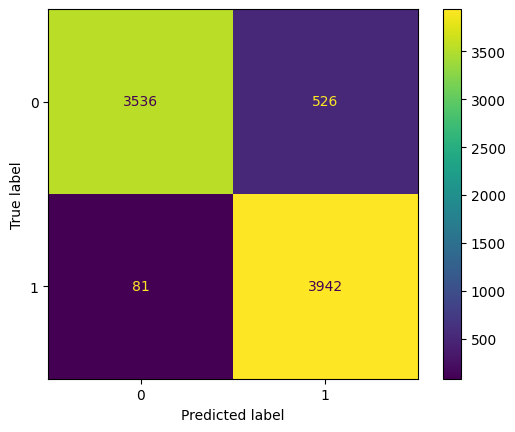

In [29]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [30]:
print(model.named_steps.keys())

dict_keys(['preprocessor', 'classifier'])


In [31]:
ohe = model.named_steps['preprocessor'].named_transformers_['cat']
feature_name = ohe.get_feature_names_out()
all_feature_name = num + list(feature_name)
all_feature_name

['year',
 'household_size',
 'age_of_respondent',
 'country_Kenya',
 'country_Rwanda',
 'country_Tanzania',
 'country_Uganda',
 'location_type_0',
 'location_type_1',
 'cellphone_access_0',
 'cellphone_access_1',
 'gender_of_respondent_0',
 'gender_of_respondent_1',
 'relationship_with_head_0',
 'relationship_with_head_1',
 'relationship_with_head_2',
 'relationship_with_head_3',
 'relationship_with_head_4',
 'relationship_with_head_5',
 'marital_status_0',
 'marital_status_1',
 'marital_status_2',
 'marital_status_3',
 'marital_status_4',
 'education_level_No formal education',
 'education_level_Other/Dont know/RTA',
 'education_level_Primary education',
 'education_level_Secondary education',
 'education_level_Tertiary education',
 'education_level_Vocational/Specialised training',
 'job_type_Dont Know/Refuse to answer',
 'job_type_Farming and Fishing',
 'job_type_Formally employed Government',
 'job_type_Formally employed Private',
 'job_type_Government Dependent',
 'job_type_Inform

In [32]:
importances = model.named_steps['classifier'].feature_importances_

In [33]:
feat_imp = pd.DataFrame(
    {
        'feature' : all_feature_name,
        'importance' : importances
    }
).sort_values(by='importance',ascending=False)

<Axes: xlabel='importance', ylabel='feature'>

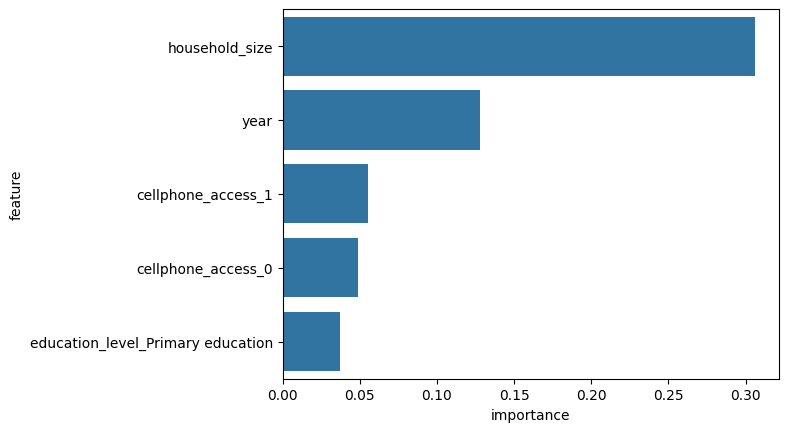

In [34]:
sns.barplot(feat_imp.head(),x='importance',y='feature')

In [35]:
with open('financial.pkl','wb') as f:
    joblib.dump(model,f)

In [36]:
df.head()

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,1,0,1,3,24,0,5,2,Secondary education,Self employed
1,Kenya,2018,0,0,0,5,70,0,1,4,No formal education,Government Dependent
2,Kenya,2018,1,1,1,5,26,1,3,3,Vocational/Specialised training,Self employed
3,Kenya,2018,0,0,1,5,34,0,1,2,Primary education,Formally employed Private
4,Kenya,2018,0,1,0,8,26,1,0,3,Primary education,Informally employed


In [8]:
encoders = {}

for col in cat_label:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le
    joblib.dump(le, f"le_{col}.pkl")

In [38]:
x={0:'NO',1:'YES'}
df['bank_account'] = df['bank_account'].map(x)

In [39]:


for col in cat_label:
    df[col] = le.fit_transform(df[col])
    print(f"Classes for {col}: {le.classes_}")

Classes for bank_account: ['NO' 'YES']
Classes for location_type: [0 1]
Classes for cellphone_access: [0 1]
Classes for gender_of_respondent: [0 1]
Classes for relationship_with_head: [0 1 2 3 4 5]
Classes for marital_status: [0 1 2 3 4]


In [46]:
encode = {}

for col in cat_label:
    df[col] = le.fit_transform(df[col])
    encode[col] = le
    with open (f'le_{col}.pkl','wb') as f:
        joblib.dump(le,f)

In [44]:
from sklearn.preprocessing import LabelEncoder
import joblib

cols = ['country', 'year', 'location_type', 'cellphone_access', 'household_size', 
        'age_of_respondent', 'gender_of_respondent', 'relationship_with_head', 
        'marital_status', 'education_level', 'job_type']

for col in cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    joblib.dump(le, f'le_{col}.pkl')  